<a href="https://colab.research.google.com/github/rbm7429-png/Laboratorio.13.RBM/blob/main/Laboratorio_15practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio - Sesion 15


MUESTRA DEL DATASET :CON 50 IMAGENES

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


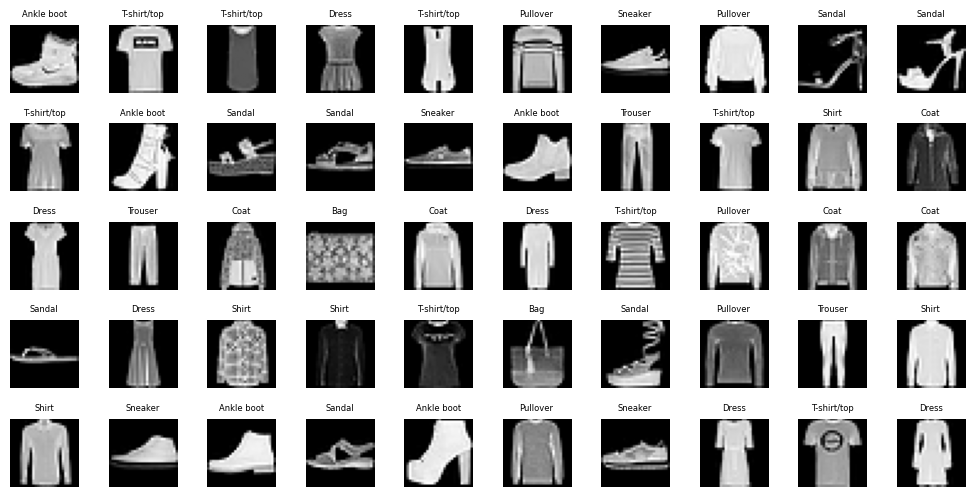

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

# Lista de nombres de las clases en Fashion MNIST
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_imgs = 50  # cantidad de imágenes que quieres mostrar
plt.figure(figsize=(10,10))

for i in range(num_imgs):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train_raw[i], cmap='gray')
    plt.axis('off')
    # título con el nombre de la categoría
    plt.title(labels[y_train[i]], fontsize=6)

plt.tight_layout()
plt.show()

In [12]:
from keras.datasets import fashion_mnist
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()


In [11]:
# ================================
# 📚 Importación de Bibliotecas
# ================================

# Manejo y análisis de datos
import pandas as pd
import numpy as np

# Modelado y evaluación con scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset Fashion MNIST desde Keras
from keras.datasets import fashion_mnist

# ================================
# 📦 Carga del conjunto de datos
# ================================

# Cargar los datos de entrenamiento y prueba
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

# Mostrar las formas de los conjuntos cargados
print("Conjunto de entrenamiento:", X_train_raw.shape, y_train.shape)
print("Conjunto de prueba:", X_test_raw.shape, y_test.shape)


Conjunto de entrenamiento: (60000, 28, 28) (60000,)
Conjunto de prueba: (10000, 28, 28) (10000,)



## Paso 1. Importación de Bibliotecas
* Importa las bibliotecas necesarias. Las más importantes para este taller son pandas para la manipulación de datos, numpy para realizar operaciones numéricas y scikit-learn para implementar el modelo KNN.

In [14]:
# ================================
# 📚 Importación de Bibliotecas
# ================================

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Implementación y evaluación del modelo KNN
from sklearn.model_selection import train_test_split     # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler         # Para escalar los datos
from sklearn.neighbors import KNeighborsClassifier       # Para crear el modelo KNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Para evaluar el modelo


## Paso 2. Cargar los Datos
* Carga un conjunto de datos que contiene las características y las etiquetas (clases) que quieres predecir. En este taller, el conjunto de datos será almacenado usando pandas, que permite manejar la información de forma tabular.

* Carga los datos usando pandas y asegúrate de que las características (features) y las etiquetas (targets) estén correctamente identificadas. Recuerda que estos datos se dividirán más adelante para entrenar y probar el modelo.

In [15]:
# ================================
# 📦 Paso 2. Cargar los Datos
# ================================

from keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

# Combinar los datos de entrenamiento y prueba para manejarlos en un solo DataFrame
X_all = np.concatenate((X_train_raw, X_test_raw))
y_all = np.concatenate((y_train, y_test))

# Aplanar las imágenes (de 28x28 a 784 columnas) para tratarlas como características numéricas
X_all_flat = X_all.reshape((X_all.shape[0], -1))

# Crear DataFrame con pandas
df = pd.DataFrame(X_all_flat)
df['label'] = y_all  # Agregar la columna con las etiquetas

# Mostrar información básica del DataFrame
print("✅ Datos cargados correctamente")
print("Forma del DataFrame:", df.shape)
print(df.head())


✅ Datos cargados correctamente
Forma del DataFrame: (70000, 785)
   0  1  2  3  4  5  6  7   8   9  ...  775  776  777  778  779  780  781  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  114  130   76    0    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    1    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   782  783  label  
0    0    0      9  
1    0    0      0  
2    0    0      0  
3    0    0      3  
4    0    0      0  

[5 rows x 785 columns]


## Paso 3. División de los Datos en Entrenamiento y Prueba
* Para evaluar el rendimiento del modelo de manera confiable, es necesario dividir el conjunto de datos en dos partes: una parte para entrenar el modelo y otra parte para probar su rendimiento. De esta forma, podemos medir si el modelo está generalizando correctamente a datos que no ha visto antes.

In [16]:
# ================================
# 🧩 Paso 3. División de los Datos
# ================================

from sklearn.model_selection import train_test_split

# Separar las características (X) y las etiquetas (y)
X = df.drop('label', axis=1)   # Todas las columnas excepto 'label'
y = df['label']                # Solo la columna 'label'

# Dividir los datos en conjunto de entrenamiento y de prueba
# test_size=0.2 → 20% de los datos para prueba
# random_state=42 → asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar resultados
print("✅ División completada correctamente")
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


✅ División completada correctamente
Tamaño del conjunto de entrenamiento: (56000, 784)
Tamaño del conjunto de prueba: (14000, 784)


## Paso 4. Escalado de los Datos
* El algoritmo KNN calcula la distancia entre las instancias para hacer predicciones, por lo que es fundamental que todas las características tengan una escala similar. Si una característica tiene valores mucho más grandes que otras, podría dominar el cálculo de la distancia. Por eso, es necesario escalar o normalizar los datos.

* Aplica una técnica de escalado (como la normalización o estandarización) a tus características. Reflexiona sobre cómo la escala de los datos puede influir en los resultados del modelo.

In [17]:
# ================================
# ⚖️ Paso 4. Escalado de los Datos
# ================================

from sklearn.preprocessing import StandardScaler

# Crear el objeto escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar la misma transformación a los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Mostrar resultados
print("✅ Escalado completado correctamente")
print("Media de los datos escalados (train):", np.mean(X_train_scaled))
print("Desviación estándar (train):", np.std(X_train_scaled))


✅ Escalado completado correctamente
Media de los datos escalados (train): -3.3235481098691273e-18
Desviación estándar (train): 0.9999999999999942


## Paso 5. Entrenamiento del Modelo KNN
* Ahora que los datos están preparados, es momento de crear el clasificador KNN. El parámetro clave aquí es K, que indica el número de vecinos cercanos que el algoritmo considerará al hacer una predicción. Un valor de K bajo puede hacer que el modelo sea muy sensible a los datos de entrenamiento, mientras que un valor alto puede hacer que el modelo sea más generalizado.

* Elige un valor de K (por ejemplo, 3 o 5) e inicializa el modelo KNN. Entrena el modelo con el conjunto de entrenamiento y asegúrate de que el proceso de ajuste se complete correctamente.

In [18]:
# ================================
# 🤖 Paso 5. Entrenamiento del Modelo KNN
# ================================

from sklearn.neighbors import KNeighborsClassifier

# Elegir el número de vecinos (K)
k = 5  # puedes probar con otros valores como 3, 7 o 9

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar (ajustar) el modelo con los datos de entrenamiento escalados
knn.fit(X_train_scaled, y_train)

# Confirmar que el entrenamiento se completó
print(f"✅ Modelo KNN entrenado correctamente con k = {k}")


✅ Modelo KNN entrenado correctamente con k = 5


## Paso 6. Realización de Predicciones
* Una vez que el modelo esté entrenado, puedes usarlo para hacer predicciones sobre el conjunto de prueba o sobre nuevos datos. El modelo buscará los K vecinos más cercanos a cada instancia y decidirá la clase basándose en la mayoría de votos entre estos vecinos.

* Usa tu modelo KNN para predecir las etiquetas de las instancias en el conjunto de prueba. Anota las predicciones y compáralas con las etiquetas reales.

In [19]:
# ================================
# 🔮 Paso 6. Realización de Predicciones
# ================================

# Usar el modelo entrenado para predecir las etiquetas del conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Mostrar algunas predicciones junto con las etiquetas reales
print("✅ Predicciones completadas correctamente\n")

print("Ejemplo de comparación entre etiquetas reales y predichas:")
for i in range(10):
    print(f"Real: {y_test.iloc[i]}  →  Predicho: {y_pred[i]}")


✅ Predicciones completadas correctamente

Ejemplo de comparación entre etiquetas reales y predichas:
Real: 2  →  Predicho: 2
Real: 7  →  Predicho: 7
Real: 0  →  Predicho: 0
Real: 7  →  Predicho: 7
Real: 9  →  Predicho: 9
Real: 2  →  Predicho: 3
Real: 7  →  Predicho: 7
Real: 6  →  Predicho: 2
Real: 5  →  Predicho: 7
Real: 4  →  Predicho: 4


## Paso 7. Evaluación del Rendimiento del Modelo
* Después de hacer las predicciones, es crucial evaluar el rendimiento del modelo. La métrica más común es la precisión (accuracy), que mide el porcentaje de predicciones correctas. También puedes usar otras métricas como la matriz de confusión para entender mejor los errores del modelo.

* Calcula la precisión del modelo y genera una matriz de confusión. Reflexiona sobre qué tan bien ha funcionado el modelo en el conjunto de prueba y si hay algún patrón en los errores de clasificación.

✅ Precisión del modelo KNN: 0.8571


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


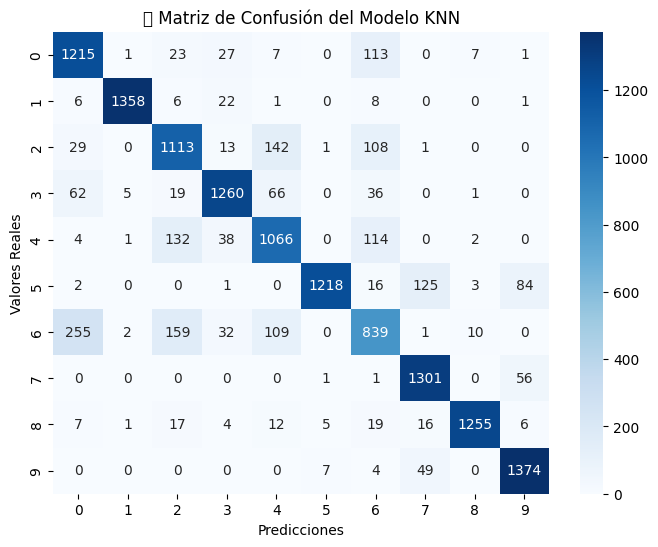


📋 Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1394
           1       0.99      0.97      0.98      1402
           2       0.76      0.79      0.77      1407
           3       0.90      0.87      0.89      1449
           4       0.76      0.79      0.77      1357
           5       0.99      0.84      0.91      1449
           6       0.67      0.60      0.63      1407
           7       0.87      0.96      0.91      1359
           8       0.98      0.94      0.96      1342
           9       0.90      0.96      0.93      1434

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



In [20]:
# ================================
# 📊 Paso 7. Evaluación del Rendimiento del Modelo
# ================================

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión de forma visual
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🔹 Matriz de Confusión del Modelo KNN")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Mostrar un reporte detallado con métricas adicionales
print("\n📋 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


## Paso 8. Exploración de los Vecinos Cercanos
* Un aspecto interesante del KNN es que puedes explorar quiénes son los vecinos más cercanos que el modelo utilizó para hacer una predicción. Esto te permite comprender mejor por qué el modelo clasificó una instancia de una manera particular.

* Elige una instancia específica de prueba y analiza quiénes fueron sus vecinos más cercanos. Reflexiona sobre cómo los vecinos influenciaron la decisión del modelo.

🔹 Etiqueta real: 2
🔹 Etiqueta predicha: 2

👥 Vecinos más cercanos (índices en el conjunto de entrenamiento):
[19891   829 42695 29254 27147]


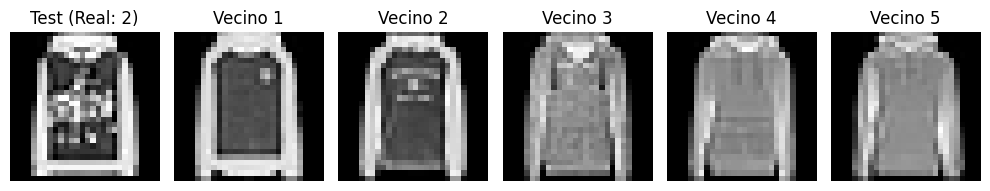

In [21]:
# ================================
# 🧭 Paso 8. Exploración de los Vecinos Cercanos
# ================================

import matplotlib.pyplot as plt

# Elegimos una instancia de prueba para analizar (por ejemplo, la número 0)
index = 0

# Obtener la imagen original de prueba
imagen_prueba = X_test.iloc[index].values.reshape(28, 28)

# Obtener la predicción del modelo para esta instancia
prediccion = knn.predict([X_test_scaled[index]])
real = y_test.iloc[index]

print(f"🔹 Etiqueta real: {real}")
print(f"🔹 Etiqueta predicha: {prediccion[0]}")

# Encontrar los vecinos más cercanos de esta instancia
distancias, indices_vecinos = knn.kneighbors([X_test_scaled[index]])

# Mostrar los índices de los vecinos más cercanos
print("\n👥 Vecinos más cercanos (índices en el conjunto de entrenamiento):")
print(indices_vecinos[0])

# Visualizar la imagen de prueba junto con sus vecinos
plt.figure(figsize=(10, 3))

# Mostrar la imagen de prueba
plt.subplot(1, k + 1, 1)
plt.imshow(imagen_prueba, cmap='gray')
plt.title(f"Test (Real: {real})")
plt.axis('off')

# Mostrar los k vecinos más cercanos
for i, idx in enumerate(indices_vecinos[0]):
    imagen_vecino = X_train.iloc[idx].values.reshape(28, 28)
    plt.subplot(1, k + 1, i + 2)
    plt.imshow(imagen_vecino, cmap='gray')
    plt.title(f"Vecino {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
